From the Online Excel Sheet

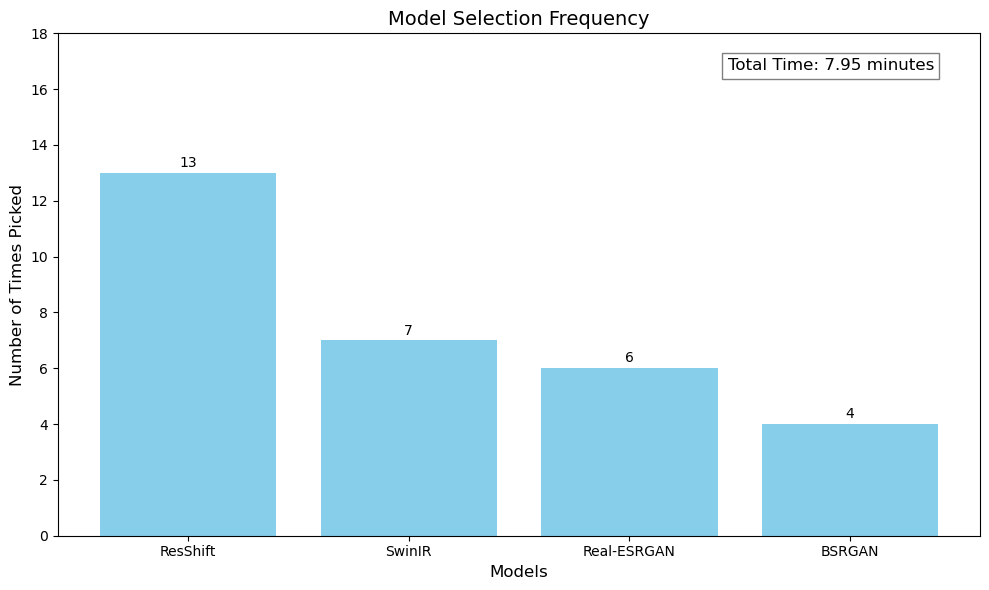

In [5]:
import matplotlib.pyplot as plt
from collections import Counter

# Data as a multi-line string
data = """
0802.png	ResShift	33.958174
0845.png	SwinIR	28.478824
0834.png	BSRGAN	28.282729
0859.png	Real-ESRGAN	38.257496
0821.png	Real-ESRGAN	10.821287
0841.png	ResShift	12.873108
0819.png	SwinIR	53.556245
0874.png	ResShift	17.147996
0824.png	Real-ESRGAN	13.971686
0837.png	SwinIR	12.559849
0861.png	ResShift	10.761678
0896.png	ResShift	13.311204
0862.png	ResShift	10.488845
0868.png	SwinIR	12.453223
0887.png	ResShift	7.909389
0873.png	BSRGAN	13.812694
0858.png	ResShift	7.077156
0831.png	SwinIR	11.567233
0884.png	SwinIR	14.336719
0899.png	BSRGAN	6.9874
0871.png	Real-ESRGAN	11.703087
0829.png	ResShift	8.847366
0838.png	BSRGAN	13.814649
0814.png	SwinIR	14.314975
0825.png	Real-ESRGAN	18.534595
0809.png	ResShift	9.064191
0816.png	ResShift	13.68246
0806.png	ResShift	11.693983
0849.png	Real-ESRGAN	8.706463
0801.png	ResShift	7.801074
"""

# Parse the data
lines = data.strip().split('\n')
models = []
total_time_seconds = 0

for line in lines:
    parts = line.split('\t')
    if len(parts) == 3:
        filename, model, time_str = parts
        models.append(model)
        try:
            time = float(time_str)
            total_time_seconds += time
        except ValueError:
            print(f"Invalid time value: {time_str} in line: {line}")

# Count the occurrences of each model
model_counts = Counter(models)

# Sort the models by count in descending order
sorted_models = sorted(model_counts.items(), key=lambda x: x[1], reverse=True)
models_sorted, counts_sorted = zip(*sorted_models)

# Create the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(models_sorted, counts_sorted, color='skyblue')

# Add counts above the bars
for bar, count in zip(bars, counts_sorted):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, str(count), 
             ha='center', va='bottom', fontsize=10)

# Add total time annotation
plt.xlabel('Models', fontsize=12)
plt.ylabel('Number of Times Picked', fontsize=12)
plt.title('Model Selection Frequency', fontsize=14)
plt.ylim(0, max(counts_sorted) + 5)

# Display total time in seconds at the end of the graph
plt.text(0.95, 0.95, f'Total Time: {total_time_seconds/60:.2f} minutes',
         horizontalalignment='right',
         verticalalignment='top',
         transform=plt.gca().transAxes,
         fontsize=12,
         bbox=dict(facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.cm as cm

# For better visualization
%matplotlib inline
sns.set(style="whitegrid")


In [18]:
# Load the data into pandas DataFrames
completed_df = pd.read_csv('sheets/super-res-results - completed.csv')
open_qs_df = pd.read_csv('sheets/super-res-results - open-qs.csv')
sessions_df = pd.read_csv('sheets/super-res-results - sessions.csv')

# Display the first few rows of each DataFrame
print("Completed Data:")
display(completed_df.head())

print("\nSessions Data:")
display(sessions_df.head())

print("\nOpen Qs Data:")
display(open_qs_df.head())


Completed Data:


,test_id,timestamp,name,age,image_name,selected_model,time_spent
0,3d1d3d8e-e144-4a84-8e25-562fb00c537c,2024-11-23T22:39:49.074729+00:00,1,1,Total Time,2.074669,NaN
1,NaN,2024-11-23T22:39:52.460077+00:00,NaN,NaN,Total Time,0.000005,NaN
2,5d1f396e-f727-4411-bad5-97e28d7818b1,2024-11-23T22:40:04.050759+00:00,1,1,Total Time,2.050698,NaN
3,NaN,2024-11-23T22:40:07.249876+00:00,NaN,NaN,Total Time,0.000005,NaN
4,7b25656f-6b35-4ecc-aac5-191d4347f5af,2024-11-23T22:51:50.598953+00:00,1,1,butterfly.png,SwinIR,6.598953



Sessions Data:


,test_id,name,age,start_time
0,aa422f9f-33fe-4be5-975c-29df8c8e5ea6,Muhammad Hamza Zafar,24,2024-11-23T11:47:48.227816+00:00
1,7e5fdf32-06ce-4fbb-89f1-9eea94b4b3c5,Eliza,24,2024-11-23T21:30:17.836331+00:00
2,f903b50a-5539-4cd5-ba93-4a76325cdc7f,Hu,56,2024-11-23T21:39:14.480110+00:00
3,1ffccace-fbd5-4256-a80b-9c007e8c36e9,Eliza,24,2024-11-23T21:56:10.086337+00:00
4,23fe1f39-2849-403b-b322-461557d7fd7b,hamza,12,2024-11-23T22:30:41.256534+00:00



Open Qs Data:


,test_id,timestamp,reason,feedback
0,7e5fdf32-06ce-4fbb-89f1-9eea94b4b3c5,2024-11-23T21:32:38.069797+00:00,balance between lack of artifacts and realisti...,No feedback provided
1,23fe1f39-2849-403b-b322-461557d7fd7b,2024-11-23T22:30:55.740151+00:00,No reason provided,No feedback provided
2,7b25656f-6b35-4ecc-aac5-191d4347f5af,2024-11-23T22:51:59.629530+00:00,No reason provided,No feedback provided
3,f57dcb8c-917a-49f1-af3d-b3af7da7659b,2024-11-23T22:52:15.287351+00:00,No reason provided,No feedback provided
4,be61d245-e975-423b-b22a-e3cfe9b91115,2024-11-23T22:56:03.780113+00:00,No reason provided,No feedback provided


In [19]:
# Block 2: Clean the "completed" Data

# Remove rows with missing test_id
completed_df = completed_df.dropna(subset=['test_id'])

# Separate 'Total Time' rows
total_time_df = completed_df[completed_df['image_name'] == 'Total Time'].copy()
completed_df = completed_df[completed_df['image_name'] != 'Total Time'].copy()

# Display to verify separation
display(completed_df.head())
display(total_time_df.head())

# Convert timestamp to datetime for non 'Total Time' rows
completed_df['timestamp'] = pd.to_datetime(completed_df['timestamp'], errors='coerce')

# Drop rows where timestamp conversion failed (NaT)
completed_df = completed_df.dropna(subset=['timestamp'])

# Sort the DataFrame by test_id and timestamp
completed_df = completed_df.sort_values(['test_id', 'timestamp'])

# Remove duplicates: keep first 30 unique images per test_id
def keep_first_n_unique(group, n=30):
    return group.drop_duplicates(subset=['image_name']).head(n)

completed_df = completed_df.groupby('test_id').apply(keep_first_n_unique).reset_index(drop=True)

# Optionally, you can inspect the cleaned data
display(completed_df.head())


,test_id,timestamp,name,age,image_name,selected_model,time_spent
4,7b25656f-6b35-4ecc-aac5-191d4347f5af,2024-11-23T22:51:50.598953+00:00,1,1,butterfly.png,SwinIR,6.598953
5,7b25656f-6b35-4ecc-aac5-191d4347f5af,2024-11-23T22:51:51.323025+00:00,1,1,ADE.png,Real-ESRGAN,1.323025
6,7b25656f-6b35-4ecc-aac5-191d4347f5af,2024-11-23T22:51:51.950315+00:00,1,1,comic3.png,SwinIR,0.950315
7,7b25656f-6b35-4ecc-aac5-191d4347f5af,2024-11-23T22:51:52.524628+00:00,1,1,oldphoto6.png,BSRGAN,1.524628
8,7b25656f-6b35-4ecc-aac5-191d4347f5af,2024-11-23T22:51:53.036220+00:00,1,1,foreman.png,Real-ESRGAN,1.036220


,test_id,timestamp,name,age,image_name,selected_model,time_spent
0,3d1d3d8e-e144-4a84-8e25-562fb00c537c,2024-11-23T22:39:49.074729+00:00,1,1,Total Time,2.074669,NaN
2,5d1f396e-f727-4411-bad5-97e28d7818b1,2024-11-23T22:40:04.050759+00:00,1,1,Total Time,2.050698,NaN
39,da6e3d2f-3e6c-4685-8b86-17f355eb234e,2024-11-23T22:59:36.238760+00:00,1,1,Total Time,NaN,7.238753
45,e083ffc3-0d41-47a2-8714-fff0b34b62a4,2024-11-23T22:59:52.032111+00:00,2,2,Total Time,NaN,5.032107
51,b456b6d7-203b-4e76-a467-fa848a825509,2024-11-23T23:03:04.117380+00:00,online,12,Total Time,NaN,14.117374


/tmp/ipykernel_1579612/3595966002.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  completed_df = completed_df.groupby('test_id').apply(keep_first_n_unique).reset_index(drop=True)


,test_id,timestamp,name,age,image_name,selected_model,time_spent
0,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:44.572384+00:00,122,12,0801.png,ResShift,6.572384
1,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:45.902902+00:00,122,12,ADE.png,Real-ESRGAN,1.902902
2,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:48.134412+00:00,122,12,0805.png,BSRGAN,3.134412
3,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:49.044600+00:00,122,12,butterfly.png,BSRGAN,1.044600
4,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:49.843840+00:00,122,12,oldphoto6.png,SwinIR,0.843840


In [20]:
# Block 3: Merge "sessions" and "open-qs" Data

# Merge sessions data to get session details
merged_df = completed_df.merge(sessions_df, on='test_id', how='left', suffixes=('', '_session'))

# Merge open-qs data
merged_df = merged_df.merge(open_qs_df, on='test_id', how='left', suffixes=('', '_oq'))

# Fill NaN values where appropriate
merged_df['feedback'] = merged_df['feedback'].fillna('No feedback provided')

# Optionally, inspect the merged data
display(merged_df.head())


,test_id,timestamp,name,age,image_name,selected_model,time_spent,name_session,age_session,start_time,timestamp_oq,reason,feedback
0,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:44.572384+00:00,122,12,0801.png,ResShift,6.572384,122,12,2024-11-23T23:46:38.002430+00:00,NaN,NaN,No feedback provided
1,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:45.902902+00:00,122,12,ADE.png,Real-ESRGAN,1.902902,122,12,2024-11-23T23:46:38.002430+00:00,NaN,NaN,No feedback provided
2,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:48.134412+00:00,122,12,0805.png,BSRGAN,3.134412,122,12,2024-11-23T23:46:38.002430+00:00,NaN,NaN,No feedback provided
3,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:49.044600+00:00,122,12,butterfly.png,BSRGAN,1.044600,122,12,2024-11-23T23:46:38.002430+00:00,NaN,NaN,No feedback provided
4,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:49.843840+00:00,122,12,oldphoto6.png,SwinIR,0.843840,122,12,2024-11-23T23:46:38.002430+00:00,NaN,NaN,No feedback provided


In [21]:
# Optional: Process Total Time Data

# Ensure 'time_spent' is numeric
total_time_df['time_spent'] = pd.to_numeric(total_time_df['time_spent'], errors='coerce')

# Aggregate total time per test_id
total_time_aggregated = total_time_df.groupby('test_id')['time_spent'].sum().reset_index()
total_time_aggregated.rename(columns={'time_spent': 'total_time_spent'}, inplace=True)

# Merge total_time_aggregated with merged_df
merged_df = merged_df.merge(total_time_aggregated, on='test_id', how='left')

# Optionally, inspect the merged data with total_time
display(merged_df.head())


,test_id,timestamp,name,age,image_name,selected_model,time_spent,name_session,age_session,start_time,timestamp_oq,reason,feedback,total_time_spent
0,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:44.572384+00:00,122,12,0801.png,ResShift,6.572384,122,12,2024-11-23T23:46:38.002430+00:00,NaN,NaN,No feedback provided,21.104716
1,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:45.902902+00:00,122,12,ADE.png,Real-ESRGAN,1.902902,122,12,2024-11-23T23:46:38.002430+00:00,NaN,NaN,No feedback provided,21.104716
2,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:48.134412+00:00,122,12,0805.png,BSRGAN,3.134412,122,12,2024-11-23T23:46:38.002430+00:00,NaN,NaN,No feedback provided,21.104716
3,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:49.044600+00:00,122,12,butterfly.png,BSRGAN,1.044600,122,12,2024-11-23T23:46:38.002430+00:00,NaN,NaN,No feedback provided,21.104716
4,01d1deff-95ea-49b4-8c52-8f1954a42bbd,2024-11-23 23:46:49.843840+00:00,122,12,oldphoto6.png,SwinIR,0.843840,122,12,2024-11-23T23:46:38.002430+00:00,NaN,NaN,No feedback provided,21.104716


/tmp/ipykernel_1579612/238167671.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_counts.index, y=model_counts.values, palette='viridis')


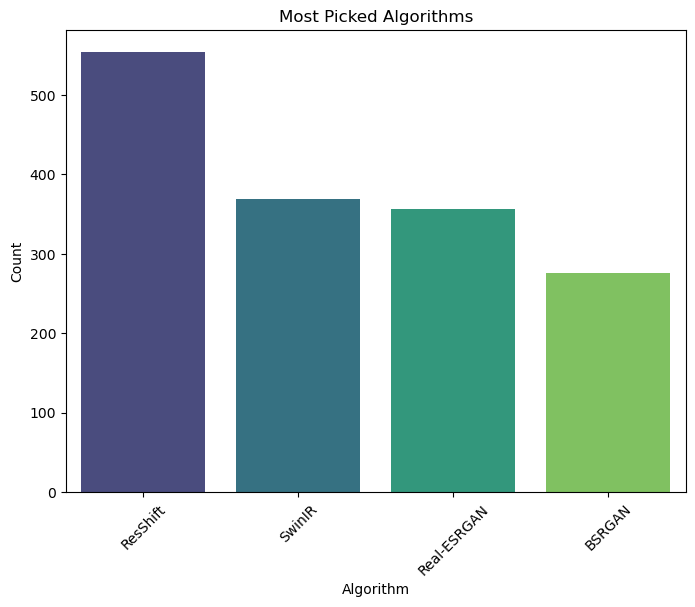

In [22]:
# Block 4: Most Picked Algorithm

# Count the occurrences of each selected_model
model_counts = completed_df['selected_model'].value_counts()

# Plotting
plt.figure(figsize=(8,6))
sns.barplot(x=model_counts.index, y=model_counts.values, palette='viridis')
plt.title('Most Picked Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


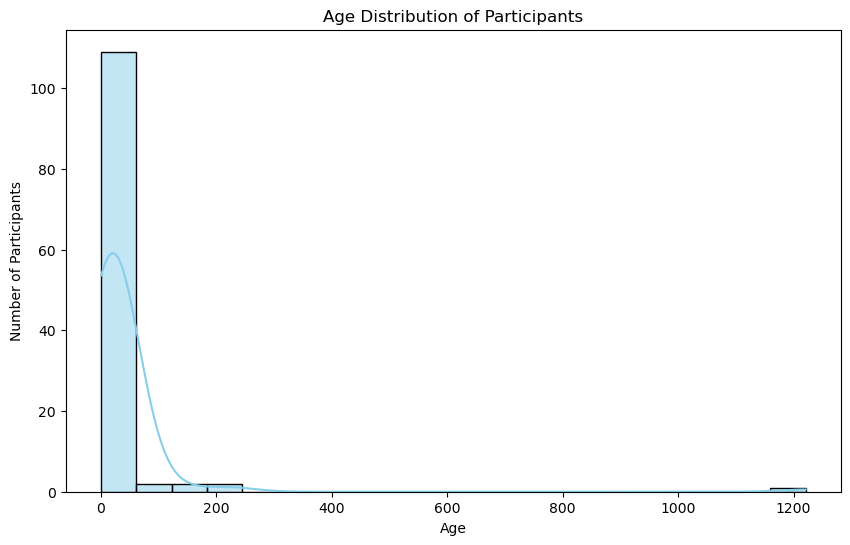

In [23]:
# Block 5: Age Distribution

# Age distribution
plt.figure(figsize=(10,6))
sns.histplot(sessions_df['age'], bins=20, kde=True, color='skyblue')
plt.title('Age Distribution of Participants')
plt.xlabel('Age')
plt.ylabel('Number of Participants')
plt.show()


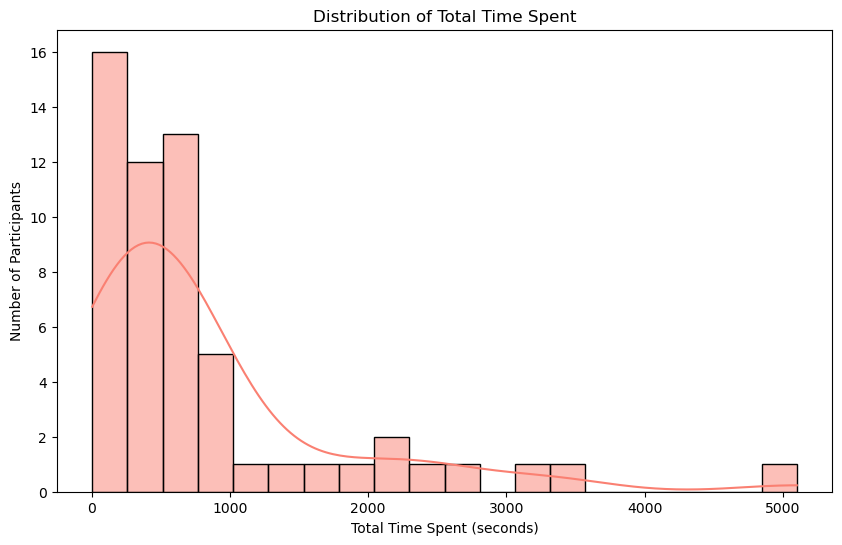

In [24]:
# Block 6: Time Distribution

# Calculate total time spent per test_id from total_time_aggregated
# If you processed total_time_df as optional step
if 'total_time_spent' in merged_df.columns:
    total_time = merged_df[['test_id', 'total_time_spent']].drop_duplicates()
else:
    # Alternatively, calculate from completed_df
    total_time = completed_df.groupby('test_id')['time_spent'].sum().reset_index()

plt.figure(figsize=(10,6))
sns.histplot(total_time['total_time_spent'], bins=20, kde=True, color='salmon')
plt.title('Distribution of Total Time Spent')
plt.xlabel('Total Time Spent (seconds)')
plt.ylabel('Number of Participants')
plt.show()


/tmp/ipykernel_1579612/2481895926.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='image_name', y='time_spent', data=completed_df, palette='Set3')


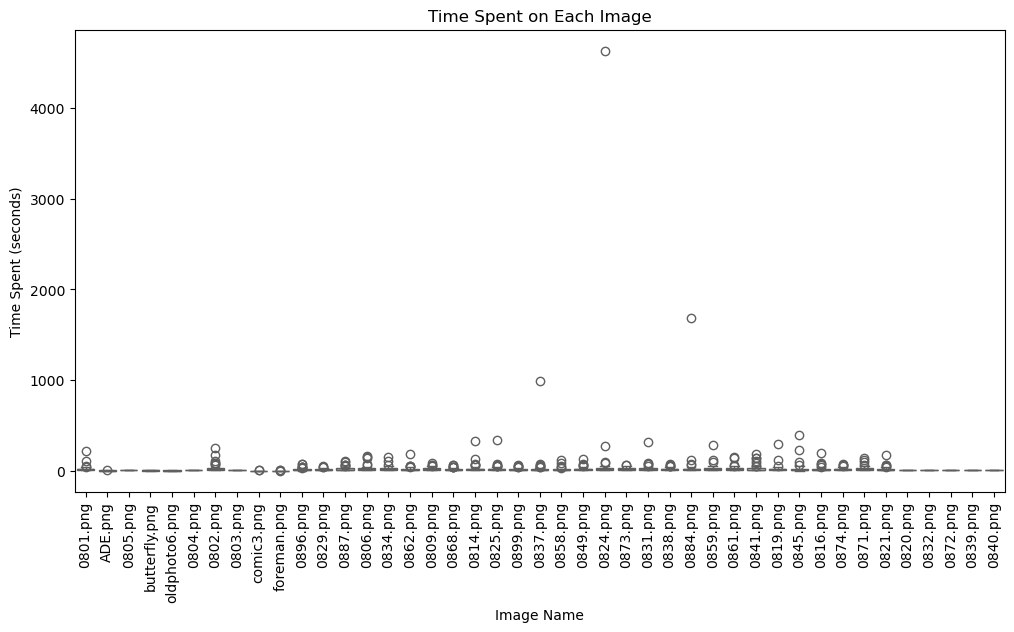

In [25]:
# Block 7: Time Spent on Images

plt.figure(figsize=(12,6))
sns.boxplot(x='image_name', y='time_spent', data=completed_df, palette='Set3')
plt.title('Time Spent on Each Image')
plt.xlabel('Image Name')
plt.ylabel('Time Spent (seconds)')
plt.xticks(rotation=90)
plt.show()


/tmp/ipykernel_1579612/926183790.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='selected_model', y='age', data=merged_df, palette='Set2')


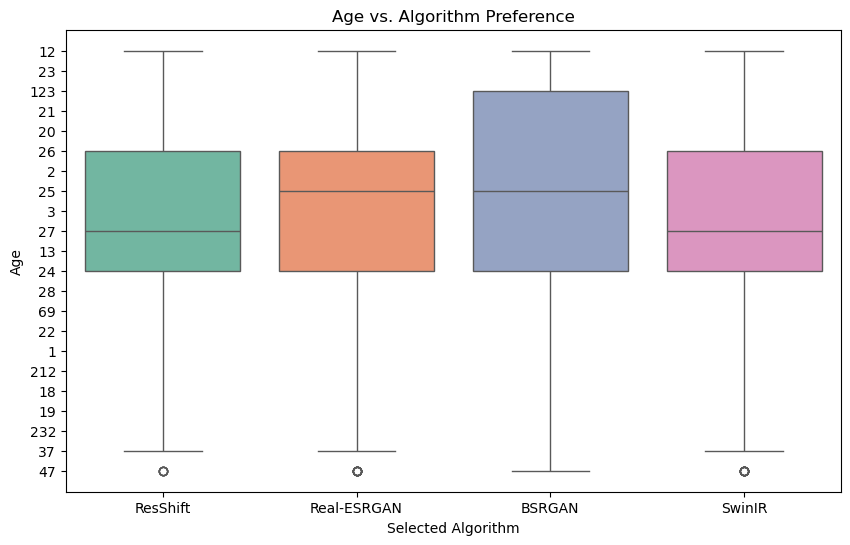

/tmp/ipykernel_1579612/926183790.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(x='selected_model', y='age', data=merged_df, palette='Set2', alpha=0.6)
/home/hamzaz/miniconda3/envs/apw/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 50.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hamzaz/miniconda3/envs/apw/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 29.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/hamzaz/miniconda3/envs/apw/lib/python3.11/site-packages/seaborn/categorical.py:3399: UserWarning: 23.7% of the points cannot be placed; you may want to decrease the size of the markers or use strip

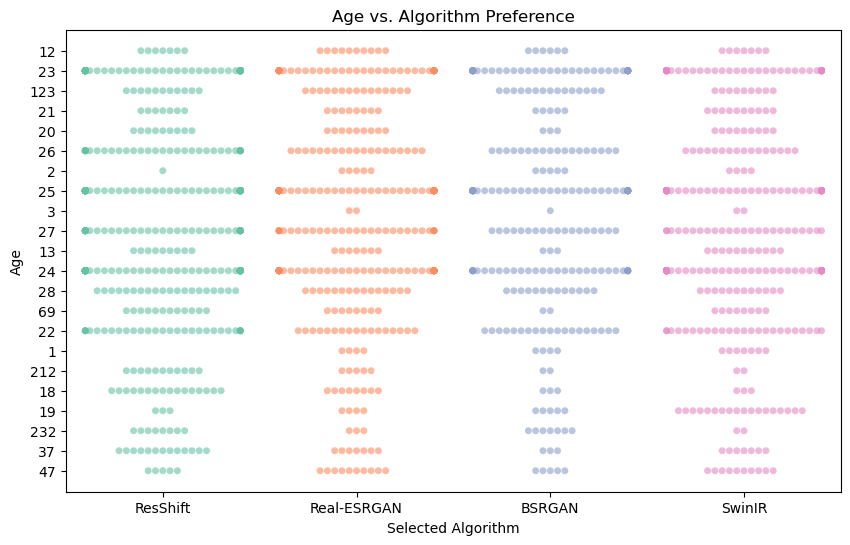

In [26]:
# Block 8: Preferences and Age Relation

plt.figure(figsize=(10,6))
sns.boxplot(x='selected_model', y='age', data=merged_df, palette='Set2')
plt.title('Age vs. Algorithm Preference')
plt.xlabel('Selected Algorithm')
plt.ylabel('Age')
plt.show()

# Alternatively, using swarm plot for better visibility
plt.figure(figsize=(10,6))
sns.swarmplot(x='selected_model', y='age', data=merged_df, palette='Set2', alpha=0.6)
plt.title('Age vs. Algorithm Preference')
plt.xlabel('Selected Algorithm')
plt.ylabel('Age')
plt.show()


/tmp/ipykernel_1579612/4177750030.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Session Type', y='Count', data=session_data, palette='pastel')


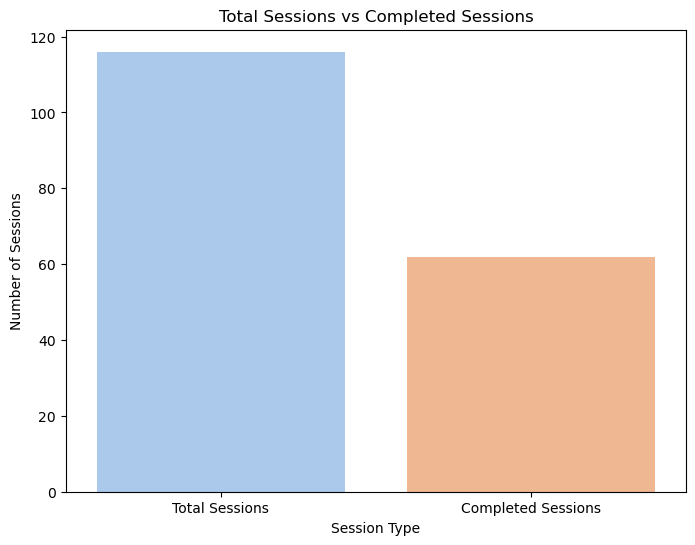

In [27]:
# Block 9: Total Sessions vs Completed Ones

total_sessions = sessions_df['test_id'].nunique()
completed_sessions = completed_df['test_id'].nunique()

session_data = pd.DataFrame({
    'Session Type': ['Total Sessions', 'Completed Sessions'],
    'Count': [total_sessions, completed_sessions]
})

plt.figure(figsize=(8,6))
sns.barplot(x='Session Type', y='Count', data=session_data, palette='pastel')
plt.title('Total Sessions vs Completed Sessions')
plt.xlabel('Session Type')
plt.ylabel('Number of Sessions')
plt.show()


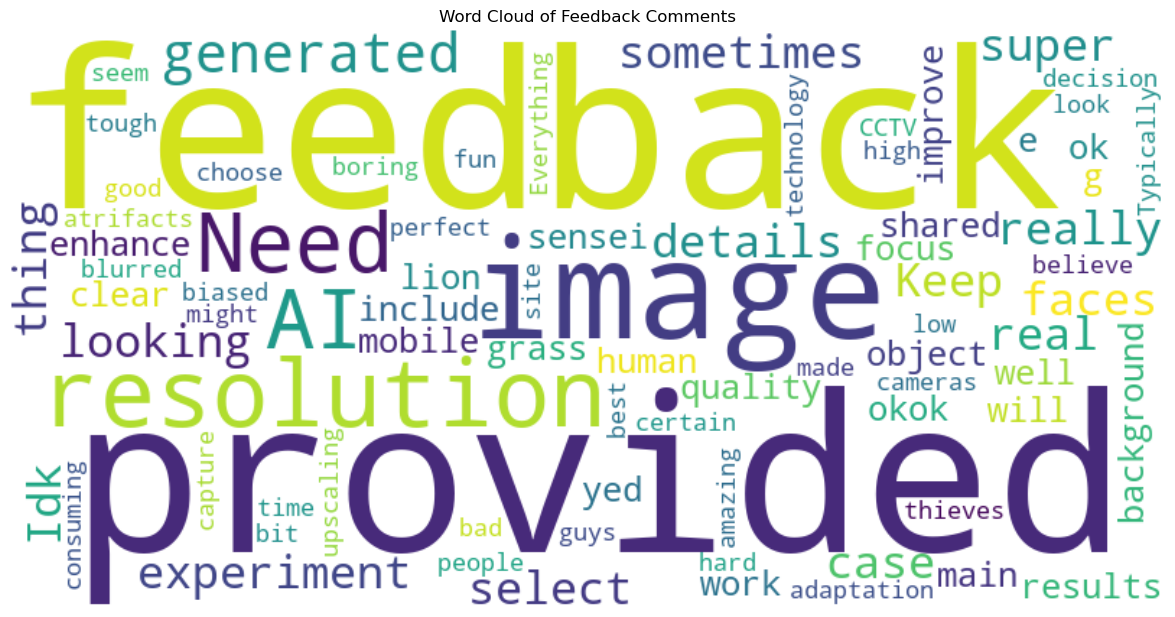

In [28]:
# Block 10: Visualizing Open Qs Comments - Word Cloud

# Combine all feedback into one string
feedback_text = ' '.join(open_qs_df['feedback'].dropna().astype(str))

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                      colormap='viridis', collocations=False).generate(feedback_text)

plt.figure(figsize=(15,7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Feedback Comments')
plt.show()


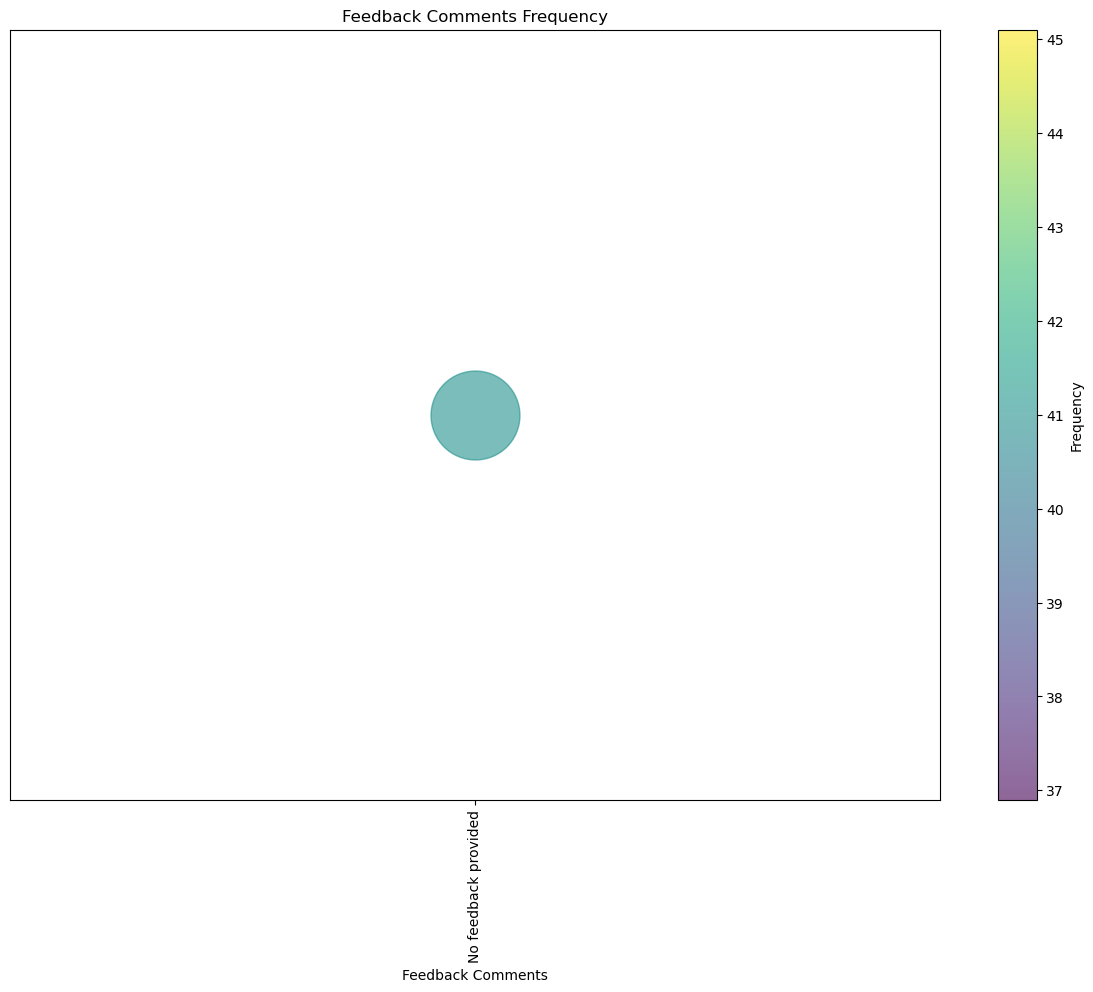

In [29]:
# Block 10: Visualizing Open Qs Comments - Frequency-Based Scatter Plot

# Count the frequency of each unique feedback
feedback_counts = open_qs_df['feedback'].value_counts().reset_index()
feedback_counts.columns = ['feedback', 'count']

# Filter out very unique comments if needed (e.g., count > 1)
feedback_counts = feedback_counts[feedback_counts['count'] > 1]

# Plotting
plt.figure(figsize=(15,10))
scatter = plt.scatter(range(len(feedback_counts)), [1]*len(feedback_counts), 
                      s=feedback_counts['count']*100, alpha=0.6, 
                      c=feedback_counts['count'], cmap='viridis')

plt.yticks([])
plt.xticks(range(len(feedback_counts)), feedback_counts['feedback'], rotation=90)
plt.colorbar(scatter, label='Frequency')
plt.title('Feedback Comments Frequency')
plt.xlabel('Feedback Comments')
plt.show()


In [ ]:
# Block 11: Save Cleaned Data (Optional)

merged_df.to_csv('cleaned_data.csv', index=False)
